# **Autoencoder Model for Word Embedding**

In [11]:
from utils.helper_function import *
import os

## **I. Import necessary things**

In [12]:
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

try:
    import pandas as pd
except ImportError:
    !pip install pandas
    import pandas as pd

try:
    from tensorflow import keras
except ImportError:
    !pip install tensorflow
    from tensorflow import keras

try:
    import re
except ImportError:
    !pip install re
    import re

try:
    import os
except ImportError:
    !pip install os
    import os

try:
    import pickle
except ImportError:
    !pip install pickle
    import pickle

try:
    import nltk
except ImportError:
    !pip install nltk
    import nltk

try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

try:
    from scipy.spatial import distance
except ImportError:
    !pip install scipy
    from scipy.spatial import distance

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **II. Load corpus and preprocess it**

In [14]:
# must install openpyxl
!pip install openpyxl

In [15]:
URLs = {
    "https://docs.google.com/spreadsheets/d/1o_iC2FYF1azE6Wrf_OS7LsjEGQOgUn8v/edit?usp=drive_link&ouid=106195316964367283586&rtpof=true&sd=true": "datasets/Corona_NLP_train.xlsx",
    "https://docs.google.com/spreadsheets/d/1m2KXEyYYUE2ak_XGS3N1SbkoL6gD_DGd/edit?usp=sharing&ouid=106195316964367283586&rtpof=true&sd=true": "datasets/Corona_NLP_test.xlsx"
}

for url, path in URLs.items():
    if not os.path.exists(path):
        download_data(url, path)

train_data = load_data("datasets/Corona_NLP_train.xlsx").iloc[:2000]

In [16]:
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
1995,5794,50746,"Amman, Hashemite Kingdom of Jo",2020-03-17,I went to the grocery store today to find out ...,Neutral
1996,5795,50747,deep in cognitive dissonance,2020-03-17,"Is this world war two, stiff upper lip in reac...",Extremely Negative
1997,5796,50748,"Boise, ID",2020-03-17,Never thought I would be waiting in line to ge...,Neutral
1998,5797,50749,"#Budapest, Nederland",2020-03-17,Visibly less people in s center No signs of pa...,Negative


In [17]:
corpus = train_data["OriginalTweet"].to_list()
corpus = "\n".join(corpus)
print(corpus[:1000])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
My food stock is not the only one which is empty...



PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. 

Stay calm, stay safe.



#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
Me, ready to go at supermarket during the #COVID19 outbreak.



Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage

In [18]:
def text_cleaner(text):
    # lower case text
    text = text.lower()
    text = re.sub(r"'s\b","",text)
    # remove punctuations
    text = re.sub("[^a-zA-Z]", " ", text)
    return text

In [19]:
try:
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize
except ImportError:
    !pip install nltk
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize

def preprocess_text(corpus):
  corpus_clean = text_cleaner(corpus)

  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(corpus_clean)
  
  return [w for w in word_tokens if not w in stop_words]

corpus_token =  preprocess_text(corpus)

In [20]:
dictionary = sorted(list(set(corpus_token)))

if os.path.exists("utils/mapping.pkl"):
  print("Load mapping")
  mapping = pickle.load(open("utils/mapping.pkl", "rb"))
else:
  print("Save mapping")
  mapping = dict((c, i) for i, c in enumerate(dictionary))
  pickle.dump(mapping, open("utils/mapping.pkl", "wb"))

print(dictionary)

Load mapping
['aa', 'aacounty', 'aagbwjm', 'ab', 'abandons', 'abate', 'abating', 'abbott', 'abc', 'abcactionnews', 'abidsuleri', 'abilene', 'ability', 'abl', 'able', 'abled', 'abou', 'abrir', 'abroad', 'abrupt', 'absolute', 'absolutely', 'absurd', 'abt', 'abuelos', 'abundance', 'abundant', 'abused', 'ac', 'aca', 'accc', 'acccgovau', 'accelerant', 'accelerated', 'accelerates', 'accelerating', 'accept', 'acceptable', 'accepting', 'access', 'accessible', 'accidentally', 'accommodate', 'accommodation', 'accommodations', 'according', 'accordingly', 'account', 'accountant', 'accounts', 'accumulation', 'accurate', 'accuse', 'accused', 'acejointhealth', 'aceli', 'ach', 'acquaintance', 'acquired', 'acquiring', 'acquisti', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activated', 'activates', 'activating', 'active', 'actively', 'activities', 'activity', 'actsofkindness', 'actual', 'actually', 'actuallyautistic', 'ad', 'adapt', 'adapting', 'adara', 'add', 'added', 'addiction', 'adding

# **III. Convert corpus to one-hot vectors & Define embedding dim**

In [21]:
embedding_dim = 256
vocab_size = len(dictionary)
print(vocab_size)

9382


In [22]:
corpus_encode = [mapping[x] for x in corpus_token]
onehot_corpus = keras.utils.to_categorical(corpus_encode, num_classes=vocab_size)
print(onehot_corpus)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **IV. Define Autoencoder model**

In [23]:
ae_model = keras.Sequential()
ae_model.add(keras.Input(shape=(vocab_size,)))
ae_model.add(keras.layers.Dense(embedding_dim, activation='relu'))
ae_model.add(keras.layers.Dense(vocab_size, activation='softmax'))

ae_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

if os.path.exists("ae_model.h5"):
  ae_model.load_weights("ae_model.h5")

ae_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     2,402,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9382)           │     2,411,174 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,813,222 (18.36 MB)

 Trainable params: 4,813,222 (18.36 MB)

 Non-trainable params: 0 (0.00 B)

# **V. Train AE model**

In [24]:
# Train model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("checkpoints/ae_model.weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

ae_model.fit(x=onehot_corpus, y=onehot_corpus, batch_size=512, epochs=10,
          validation_split=0.2, validation_freq=1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb])

ae_model.save("checkpoints/ae_model.weights.h5")

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.2676 - loss: 9.0201 - val_accuracy: 0.1288 - val_loss: 7.8202
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.1010 - loss: 7.2431 - val_accuracy: 0.0327 - val_loss: 6.9033
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.0873 - loss: 6.4220 - val_accuracy: 0.2304 - val_loss: 6.2281
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.2783 - loss: 5.5144 - val_accuracy: 0.4335 - val_loss: 5.3560
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.4840 - loss: 4.4894 - val_accuracy: 0.5754 - val_loss: 4.6322
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.6252 - loss: 3.5841 - val_accuracy: 0.6411 - val_loss: 4.1622
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.6825 - loss: 3.0534 - val_accuracy: 0.6754 - val_loss: 3.8793
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.7235 - loss: 2.6891 - val_accura

# =======================================================================

# **How to use trained model**

# =======================================================================

# **VI. Load trained model & Get output of 1st FC layer**

In [27]:
reconstructed_model = keras.models.load_model("checkpoints/ae_model.weights.h5")
we_model = keras.models.Model(inputs=reconstructed_model.inputs, outputs=reconstructed_model.get_layer('dense').output)

Define function to encode one-hot list of words

In [28]:
def encode_onehot(mapping, list_words):
  output = []
  
  for word in list_words:
    word_vector = [0 for _ in range(vocab_size)]

    if word in mapping.keys():
      word_index = mapping[word]
      word_vector[word_index] = 1
    
    output.append(word_vector)
  
  return output

# **VII. Test model**

In [29]:
input_sentence = "Covid is very dangerous"

preprocess_sentence = preprocess_text(input_sentence)
onehot_sentence = encode_onehot(mapping, preprocess_sentence)

print(onehot_sentence)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
onehot_sentence = np.array(onehot_sentence)

In [31]:
embedded_sentence = we_model.predict(onehot_sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


e:\General_Subjects\Natural Language Processing\Lab-NLP\christ\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


In [36]:
word_0 = "virus"
word_1 = "vaccines"
word_2 = "playing"

preprocess_words = preprocess_text(' '.join([word_0, word_1, word_2]))
onehot_words = encode_onehot(mapping, preprocess_words)

# convert to numpy array
onehot_words = np.array(onehot_words)

word_0_eb, word_1_eb, word_2_eb = we_model.predict(onehot_words)

# print("OUTPUT EMBEDDING")
# print(word_0_eb)
# print(word_1_eb)
# print(word_2_eb)

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
OUTPUT DISTANCE
0 vs 1:  4.834953308105469
1 vs 2:  3.8797457218170166
2 vs 0:  4.971914291381836


In [37]:
try:
    from scipy.spatial import distance_matrix
except ImportError:
    !pip install scipy
    from scipy.spatial import distance_matrix
try:
    import seaborn as sn
except ImportError:
    !pip install seaborn
    import seaborn as sn
try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

list_words = ["virus", "corona", "hotel", "covid", "breath", "car", "immune", "vaccines", "money", "playing"]
onehot_words = encode_onehot(mapping, list_words)
onehot_words = np.array(onehot_words)

In [38]:
list_word_embs = we_model.predict(onehot_words)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [39]:
dm = distance_matrix(list_word_embs, list_word_embs, p=2)

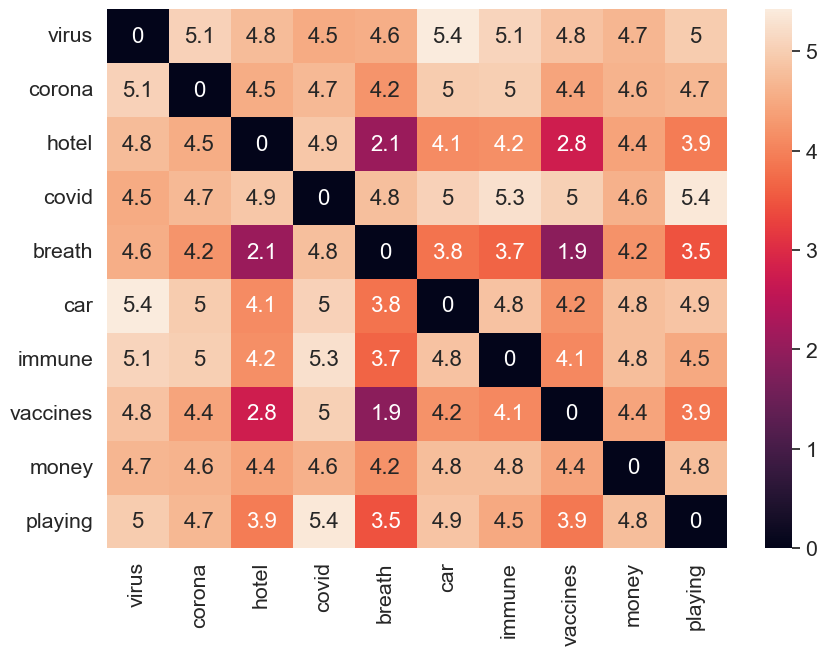

In [40]:
df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set_theme(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# **Use AE for sentiment analysis**

In [8]:
labels = train_data["Sentiment"].to_list()
context = train_data["OriginalTweet"].to_list()

In [9]:
assert len(labels) == len(context)

In [ ]:
# use AE model to encode context
context_token = [preprocess_text(x) for x in context]
context_encode = [encode_onehot(mapping, x) for x in context_token]
print(context_encode)

In [ ]:
context_encode = np.array(context_encode)

context_embs = we_model.predict(context_encode)